# Theory

Let's call a given natal kick distribution model $M(\vec{\theta})$, where $\vec{\theta} = \{v_{ns}, \sigma_{ns}\}$ for the Mandel Muller 2020 model.

Any given pulsar data set from Deller can be expressed as a collection of equally likely data points $\{d_i\}$.

Then, the likelihood of reproducing the data set using our model is given by:
$$p(d_i | M) = \int p(d_i | v_i) \cdot p(v_i|M) \cdot d v_i$$

Using the data files from Deller, we can compute the posterior on the velocity distribution as: 
$$p(v_i | d_i) = \frac{p(d_i | v_i) \cdot \pi(v_i)}{p(d_i)}$$
where $\pi(v_i)$ is our prior on the velocity distribution, and $p(d_i)$ is a normalization.


We will assume a flat prior $\pi$, and we will ignore the normalization factor $p(d_i)$ since it doesn't affect the probability distribution, i.e. it is independent of $v_i$.

Therefore, we can make the simplifying assumption that 
$$p(v_i|d_i) = p(d_i|v_i).$$

We can now re-write the likelihood equation as:
$$p(d_i | M) \approx \int p(v_i | d_i) \cdot p(v_i|M) \cdot d v_i .$$

$p(v_i | d_i)$ can be read off from the posterior data, since it is simply the probability distribution of the velocity measurements.

Thus, the probability of drawing a given pulsar $d_i$ from a model $M$ is given by:
$$p(d_i|M) = \langle p(v_i | M) \rangle.$$

Here, $p(v_i|M)$ is the probability of drawing a given velocity, which appears in the data set, from model $M$. The average over all these probabilities gives the overall probability of drawing this pulsar from the model.

Finally, the probability of drawing all $N$ pulsars from model M is
$$p(d|M) = \prod_{i=1}^{N} p(d_i|M).$$

To get $p(v_i|M)$, for now we will simply assume that the model velocities are transverse. **In general, this is a poor assumption**. We must project all the velocities along isotropically distributed planar directions to get a modeled probability distribution for Transverse Velocity. I expect that the current calculation **underestimates** the true velocity multiplier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import time
from scipy import interpolate

In [2]:
from natal_kick_tools import mandel_muller_likelihood_functions as mmf

In [3]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


# Probability from COMPAS simulated models

In [4]:
# Define the models of interest
bh_kicks=[200]
ns_kicks = [200, 400, 800]
sigmas = [0.01, 0.3, 0.7]

# Define the location of the posterior data
pulsar_data_loc = "../correctedPulsarPosteriors/correctedVtData"

## Compute all the likelihoods for the 89 pulsars

In [5]:
# start = time.time() 
# p_models = mmf.get_pulsar_probability(pulsar_data_loc, bh_kicks=bh_kicks, ns_kicks=ns_kicks, sigmas=sigmas)
# end = time.time()

# print("Complete calculation completed in:", end - start, "s")

## Read likelihoods from files instead

In [7]:
p_models = []
columns = [] # labels for plotting later
for ns_kick in ns_kicks:
    for sigma in sigmas:
        fname = f"calculatedModelLikelihoods/vns_{ns_kick}_sigma_{sigma}"
        all_likelihoods = np.loadtxt(fname)
        p_models.append(np.prod(all_likelihoods))
        
        col_name = f"vns_{ns_kick}_sigma_{sigma}"
        columns.append(col_name)
        
# normalize the array
p_models = p_models/np.sum(p_models)

In [8]:
p_models

array([0.00000000e+00, 2.60732210e-10, 1.77628101e-09, 0.00000000e+00,
       9.00375023e-01, 9.96249744e-02, 0.00000000e+00, 1.32867375e-13,
       1.25746712e-10])

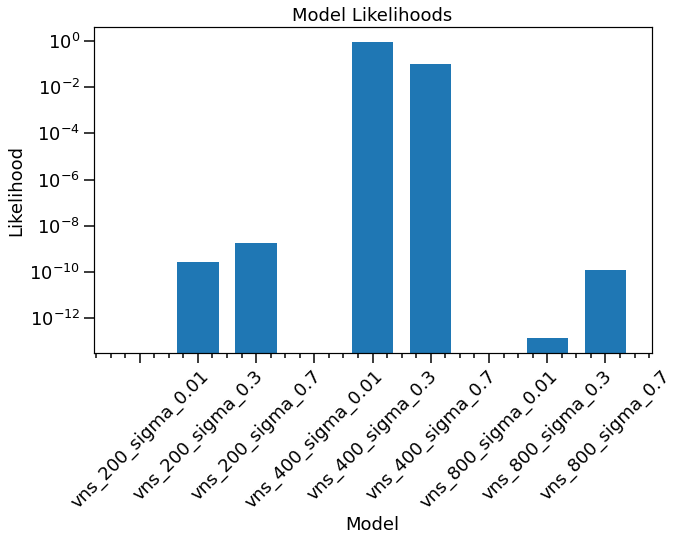

In [14]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

x_range = np.linspace(0, len(p_models), len(p_models))
plt.bar(x_range, p_models, tick_label=columns)

layoutAxes(ax=ax, nameX='Model',\
           nameY='Likelihood')
plt.xticks(rotation=45)
plt.semilogy()

plt.title("Model Likelihoods", fontsize=18)

plt.show()